In [1]:
%pylab inline
import pysd
import numpy

Populating the interactive namespace from numpy and matplotlib


/Users/houghton/anaconda/lib/python3.6/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


# Basic Goal Erosion

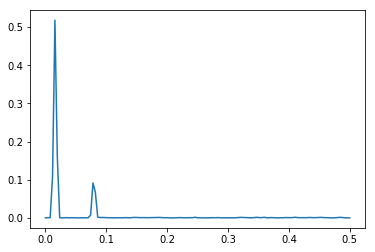

In [7]:
from scipy import signal
x = np.arange(0,100,.1)
t_series = np.sin(x) + np.random.uniform(size=(len(x))) + .5 * np.sin(5*x)

frequencies, power = signal.welch(t_series, scaling='spectrum')
plt.plot(frequencies, power)

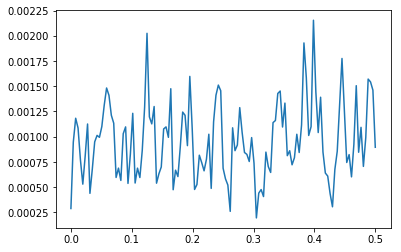

In [9]:
from scipy import signal
x = np.arange(0,100,.1)
t_series = np.random.uniform(size=(len(x)))

frequencies, power = signal.welch(t_series, scaling='spectrum')
plt.plot(frequencies, power)

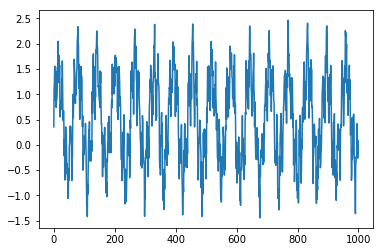

In [8]:
plt.plot(t_series)

In [31]:
model = pysd.read_vensim('Floating_Goals.mdl')

def steady_state(time_ratio, initial_gap):
    initial_state = 0
    state_adjustment_time = 10
    return model.run(params={
        'Initial State of the System': initial_state,
        'Initial Goal': initial_state + initial_gap,
        'State Adjustment Time': state_adjustment_time,
        'Goal Adjustment Time': state_adjustment_time * time_ratio,
    },
                    return_timestamps=[100],
                    reload=True)['State of the System'].iloc[-1]

steady_state(1, 1)

0.49999999903211645

In [24]:
time_ratio = np.logspace(-1,1,20)
initial_gap = np.arange(-10,10,1)
tr, ig = np.meshgrid(time_ratio, initial_gap)

vss = np.vectorize(steady_state)
ss = vss(tr, ig) 


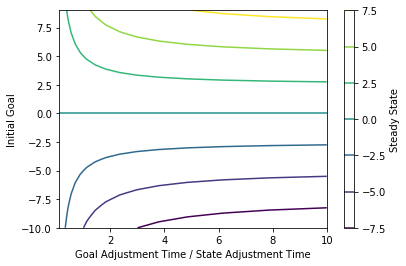

In [30]:
plt.contour(tr, ig, ss)
plt.xlabel('Goal Adjustment Time / State Adjustment Time')
plt.ylabel('Initial Goal')
plt.colorbar(label='Steady State');

# Competing Goals

In [ ]:
comp_model = pysd.read_vensim('Competing_Goals.mdl')
def comp_steady_state(time_ratio, initial_gap):
    initial_state = 0
    state_adjustment_time = 10
    return model.run(params={
        'Initial State of the System': initial_state,
        'Initial Goal': initial_state + initial_gap,
        'State Adjustment Time': state_adjustment_time,
        'Goal Adjustment Time': state_adjustment_time * time_ratio,
    },
                    return_timestamps=[100],
                    reload=True)['State of the System'].iloc[-1]

steady_state(1, 1)